# First Project Work Week Assignment



### Business Understanding

<font color='blue'>
_Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific._
</font>

__Goal__

Predict default yes/no given the data.

 - Can we predict with X level of confidence?
 - Can I (something something banking jargon) interest rates (Paul will fill out)
 - Maximize sensitivity even if false positives.
 - Logistic Regression?
 - Sensitivity and Specificity (Need to determine what level is appropriate?)

20% of the observations are default scenarios

### Data Meaning Type

<font color='blue'>
_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file._
</font>

#### Attribute Information

This data set was attained from the UCI Machine Learning Repository. It is a 6 month history of 30,000 Taiwanese credit account balances and transactions.

Each observation contains a binary reponse variable "default" with values 1 indicating a default occured and 0 indicating no default occured.

The following explanatory variables are included:

 - LIMIT_BAL = Total credit amount allowed
 
 - SEX
     -  1 = Male
     -  2 = Female
 
 - EDUCATION
     - 1 = Graduate School
     - 2 = University
     - 3 = High School
     - 4 = Other
   
 - MARRIAGE
     - 1 = Married
     - 2 = Single
     - 3 = Other
       
 - AGE = Credit holder age in years
 
Payment history (2005)
 - PAY_0 = September
 - PAY_2 = August
 - PAY_3 = July
 - PAY_4 = June
 - PAY_5 = May
 - PAY_6 = April
      -  -1 = payment received on time
      -   1 = payment received one month late
      -   2 = payment received two months late
      -   "......"
      -   9 = payment received nine months late or more
         
Statement amount (NT dollars, 2005)
 - BILL_AMT1 = September
 - BILL_AMT2 = August
 - BILL_AMT3 = July
 - BILL_AMT4 = June
 - BILL_AMT5 = May
 - BILL_AMT6 = April
 
Previous Payment (NT dollars, 2005).
 - PAY_AMT1 = September
 - PAY_AMT2 = August
 - PAY_AMT3 = July
 - PAY_AMT4 = June
 - PAY_AMT5 = May
 - PAY_AMT6 = April

Original Source Data Set Information  
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

In [1]:
#import the data
import pandas as pd
df = pd.read_csv('Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.index = df.ID
if 'ID' in df:
    del df['ID']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Pandas defaulted all data types to integer.
The source has no explicit data type descriptions but there is enough context to safely change the datatypes of all continuous variables to floats.

In [2]:
import numpy as np

# Change numeric values to floats
continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']

ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

#categ_features = ['SEX', 'default']
#df[categ_features] = df[categ_features].astype(np.object)

#convert any non-identified education categories to 'OTHER'
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=(0,5,6),value=4)

#convert any non-identified marriage categories to 'OTHER'
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=(0),value=3)

#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

payments = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['TotalMonthsLate'] = df[payments].sum(axis=1)

#transform continuous variables as they each have a mostly exponential distribution
df[continuous_features] = df[continuous_features].replace(to_replace=0,value=np.nan).apply(np.log)
#df[continuous_features] = df[continuous_features].apply(np.log)

df.describe()

#df.dtypes

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default,USAGE_1,USAGE_2,USAGE_3,USAGE_4,USAGE_5,USAGE_6,TotalMonthsLate
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,23297.000000,22827.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,11.663002,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,7.765351,7.794879,0.221200,0.423771,0.411128,0.392192,0.359503,0.333108,0.318585,-1.094633
std,0.941135,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,1.347209,1.357764,0.415062,0.411462,0.404555,0.396449,0.368686,0.350542,0.345301,5.893055
min,9.210340,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,-0.619892,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530,-12.000000
25%,10.819778,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,6.907755,6.907755,0.000000,0.022032,0.018318,0.016030,0.014299,0.011133,0.007800,-5.000000
50%,11.849398,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.740664,7.777374,0.000000,0.313994,0.296057,0.273135,0.242066,0.212026,0.185224,0.000000
75%,12.388394,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.517193,8.517593,0.000000,0.829843,0.806500,0.755107,0.667937,0.602245,0.582169,0.000000
max,13.815511,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,12.963436,13.178112,1.000000,6.455300,6.380500,10.688575,5.146850,4.935500,3.885550,36.000000


### Data Quality

<font color='blue'>
_Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods._

</font>


In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,default,USAGE_1,USAGE_2,USAGE_3,USAGE_4,USAGE_5,USAGE_6,TotalMonthsLate
ID,,,,,,,,,,,,,,,,,,,,,
1,9.903488,2,2,1,24,2,2,-1,-1,-2,...,NaN,NaN,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,-2
2,11.695247,2,2,2,26,-1,2,0,0,0,...,NaN,7.600902,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,3
3,11.407565,2,2,2,34,0,0,0,0,0,...,6.907755,8.517193,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0
4,10.819778,2,2,1,37,0,0,0,0,0,...,6.974479,6.907755,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0
5,10.819778,1,2,1,57,-1,0,-1,0,0,...,6.535241,6.520621,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,-2


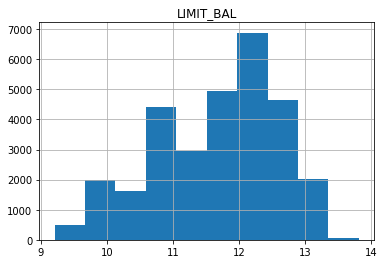

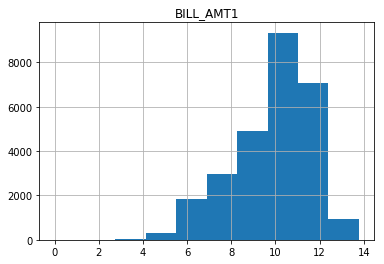

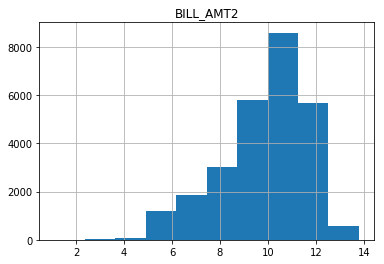

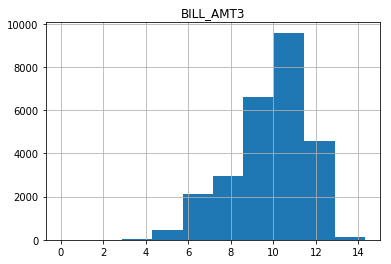

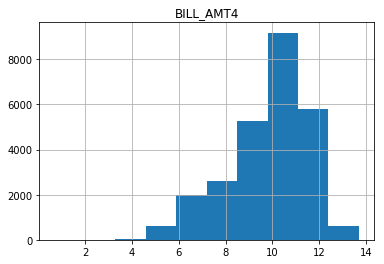

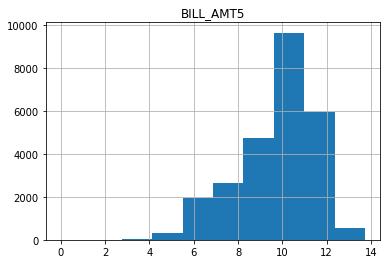

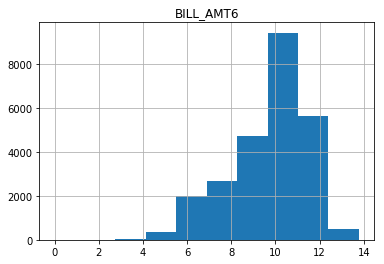

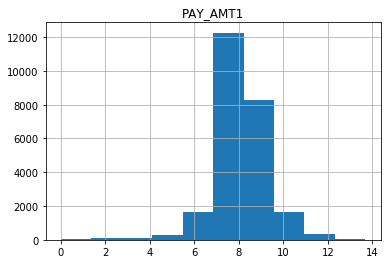

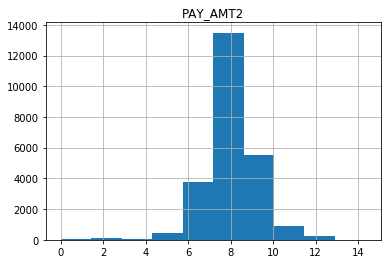

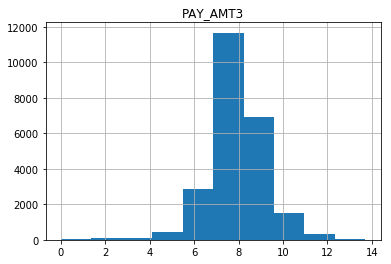

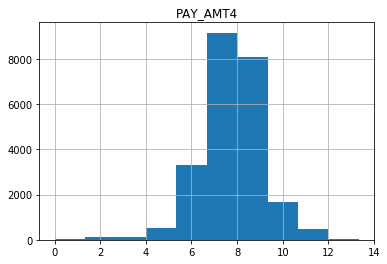

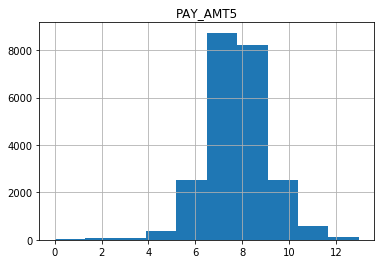

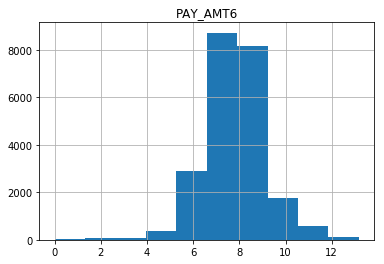

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
lb = df.hist(['LIMIT_BAL'])
ba1 = df.hist(['BILL_AMT1'])
ba2 = df.hist(['BILL_AMT2'])
ba3 = df.hist(['BILL_AMT3'])
ba4 = df.hist(['BILL_AMT4']) 
ba5 = df.hist(['BILL_AMT5'])
ba6 = df.hist(['BILL_AMT6'])
pa1 = df.hist(['PAY_AMT1'])
pa2 = df.hist(['PAY_AMT2'])
pa3 = df.hist(['PAY_AMT3'])
pa4 = df.hist(['PAY_AMT4'])
pa5 = df.hist(['PAY_AMT5'])
pa6 = df.hist(['PAY_AMT6'])

#look at records (maybe 18 and 19) there were not sensical - delinquent payments but no balance due. Maybe about 17 of these.

In [5]:
dfs=df.sample(n=300, replace=False)

In [6]:
# %matplotlib inline
# from matplotlib import pyplot as plt
# import seaborn as sns
# sns.set()
# sns.pairplot(dfs, hue="default", size=2)

# # from pandas.plotting import scatter_matrix
# # ax = scatter_matrix(dfs,figsize=(50,50))

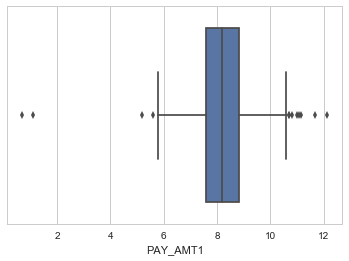

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=dfs['PAY_AMT1'])

### Simple Statistics

<font color='blue'>
_Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful._
</font>

### Visualize Attributes

<font color='blue'>
_Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate._
</font>

In [8]:
#python code

### Explore Joint Attributes

<font color='blue'>
_Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships._
</font>


In [9]:
#python code

### Explore Attributes and Class

<font color='blue'>
_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._
</font>


In [10]:
#python code

### New Features

<font color='blue'>
_Are there other features that could be added to the data or created from existing features? Which ones?_
</font>

In [11]:
#python code

### Exceptional Work

<font color='blue'>
_You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results._
</font>

In [12]:
#python code
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


# let's set those values to NaN, so that Pandas understand they are missing
df = df.replace(to_replace=-1,value=np.nan) # replace -1 with NaN (not a number)
print (df.info())
df.describe() # scroll over to see the values
















pca_features = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6','SEX']
df_pca = dfs[pca_features].astype(np.float64)

#Center means around 0
#Scale the data so all std dev = 1.
#Transpose so sample in rows rather than columns so we use .T to transpose
scaled_data = preprocessing.scale(df_pca.T)

#Include maybe only age.

#create a PCA object
pca=PCA()

#Calculate loading scores and variation each component accounts for
pca.fit(scaled_data)

#Generate Coords for the graph based on the loading scores and scaled data
pca_data=pca.transform(scaled_data)

#Look at things
#df_pca.head()
#print(pca)
#df_pca.dtypes
#pca_data is 22x22 matrix
#print(pca_data)
#print(df_pca)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Scree plot
plt.rcParams['figure.figsize'] = [10, 5]
#Calculate % that each comp accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

#Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Create matplotlib bar (scree) plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
pca_df = pd.DataFrame(pca_data,index = [*pca_features],columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#add sample names to the graph
for sample in pca_df.index:
    #plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    #plt.figure(figsize=(18, 16))
    plt.show
    

### Appendix

#### Jupyter Formatting Cheatsheet
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
    


<font color='blue'> 
You are to perform analysis of a data set: exploring the statistical summaries of the features,
visualizing the attributes, and making conclusions from the visualizations and analysis. Follow the
CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only
the portions relevant to understanding and visualization). This report is worth 20% of the final
grade. Please upload a report (one per team) with all code used, visualizations, and text in a single
document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in
whatever format you like, but it is easiest to turn in the rendered Jupyter notebook.

__A note on grading:__ This lab is mostly about visualizing and understanding your dataset. The
largest share of the points is from how you interpret the visuals that you make. Making the visuals
is not enough to satisfy each of the rubrics below—you should appropriately explain what the
implications of the visualizations are. In other words, expect about 20% of the available points for
visuals that have no substantive discussion.
</font>

In [ ]:
import numba.cuda
import numpy as np
import math

my_gpu = numba.vectorize(df.AGE)
print (my_gpu)